In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt

In [2]:
def vote_predict(train_yr):
    prev_df = pd.read_csv(os.path.join("Data", str(train_yr) + ".csv"))
    return prev_df

In [3]:
mvp = pd.read_csv("Data/mvp.csv")
current_pg = pd.read_csv("Data/pergame.csv")
current_adv = pd.read_csv("Data/advanced.csv")
current_pg = current_pg.drop(["Pos","GS","FG", "FGA", "ORB", "DRB", "3P", "3PA", "2P", "2PA", "2P%", "FT", "FTA", "TOV", "PF", "eFG%"], axis=1)
current_adv = current_adv.drop(["Rk", "Pos", "age", "Team", "g", "MP", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TOV%", "TRB%", "AST%", "STL%", "BLK%", "OBPM", "DBPM", "BPM", "VORP"], axis=1)
all_curr_data = pd.merge(left=current_pg, right=current_adv, left_on="player", right_on="player")
test = pd.read_csv("Data/2020.csv")
test2 = pd.read_csv("Data/2019.csv")

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(test[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]], test["points_won"])

LinearRegression()

In [30]:
all_curr_data["predicted_votes"] = lr.predict(all_curr_data[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]])

In [31]:
all_curr_data.sort_values("predicted_votes", ascending=False)

,Rk,player,age,Team,g,mp_per_g,fg_pct,fg3_pct,ft_pct,trb_per_g,...,stl_per_g,blk_per_g,pts_per_g,PER,USG%,OWS,DWS,ws,ws_per_48,predicted_votes
4,5,Giannis Antetokounmpo,26,MIL,53,33.0,0.568,0.305,0.684,11.2,...,1.2,1.2,28.0,29.1,32.6,5.8,3.1,8.9,0.244,592.690899
10,11,Nikola Jokić,25,DEN,64,35.0,0.568,0.412,0.860,10.9,...,1.4,0.7,26.2,31.1,29.2,10.9,3.1,14.0,0.300,564.645561
2,3,Luka Dončić,21,DAL,57,35.2,0.486,0.356,0.725,8.0,...,1.0,0.6,28.6,26.0,35.8,5.0,2.3,7.4,0.176,489.602818
12,13,Kawhi Leonard,29,LAC,47,34.3,0.517,0.397,0.878,6.6,...,1.6,0.4,25.5,26.8,29.0,6.0,2.1,8.2,0.243,175.574441
13,14,Trae Young,22,ATL,56,34.2,0.434,0.359,0.878,3.9,...,0.9,0.2,25.5,22.9,33.0,5.2,1.1,6.3,0.158,161.525892
0,1,Stephen Curry,32,GSW,56,34.0,0.486,0.426,0.916,5.5,...,1.2,0.1,31.3,26.1,34.0,5.8,2.1,7.9,0.199,149.315804
7,8,Kyrie Irving,28,BRK,47,35.2,0.502,0.384,0.924,4.9,...,1.3,0.6,26.9,24.2,30.5,5.1,1.3,6.4,0.185,135.428660
9,10,Jayson Tatum,22,BOS,57,35.9,0.458,0.388,0.870,7.5,...,1.2,0.4,26.4,21.3,30.7,3.8,2.2,6.0,0.140,99.161482
3,4,Damian Lillard,30,POR,58,35.8,0.435,0.378,0.926,4.2,...,0.9,0.3,28.3,24.5,31.7,7.5,0.6,8.1,0.187,74.558249
6,7,Zion Williamson,20,NOP,59,33.1,0.616,0.313,0.694,7.1,...,0.9,0.6,27.0,27.4,29.8,7.2,1.4,8.6,0.212,26.260633


In [32]:
lr.score(test2[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]], test2["points_won"])

-0.41737014617092294

In [8]:
keys = ["Points", "Rebounds", "Assists", "Steals", "Blocks", "Win Shares", "WS per 48 Minutes"]

<AxesSubplot:xlabel='Feature', ylabel='Coefficient'>

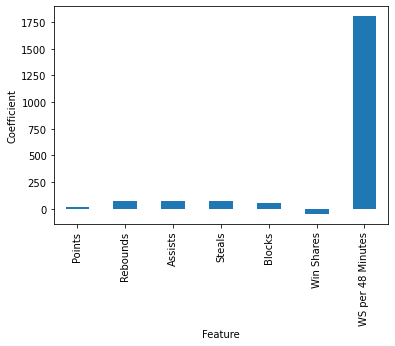

In [9]:
coefs = lr.coef_
series = pd.Series(coefs, keys, )
series.plot.bar(xlabel="Feature", ylabel="Coefficient")

In [10]:
percent_vote = list()
for season in mvp["Season"]:
    try:
        df = pd.read_csv(os.path.join("Data", str(season) + ".csv"))
        percent_vote.append(df["award_share"][0])
    except:
        percent_vote.append("NaN")
mvp["award_share"] = percent_vote

In [11]:
mvp[["Season", "Player", "PTS", "WS", "award_share"]]

,Season,Player,PTS,WS,award_share
0,2020,Giannis Antetokounmpo,29.5,11.1,0.952
1,2019,Giannis Antetokounmpo,27.7,14.4,0.932
2,2018,James Harden,30.4,15.4,0.955
3,2017,Russell Westbrook,31.6,13.1,0.879
4,2016,Stephen Curry,30.1,17.9,1
...,...,...,...,...,...
60,1960,Wilt Chamberlain,37.6,17.0,0.684
61,1959,Bob Pettit,29.2,14.8,0.773
62,1958,Bill Russell,16.6,11.3,0.57
63,1957,Bob Cousy,20.6,8.8,0.288


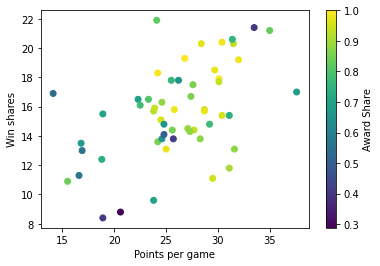

In [12]:
plt.scatter(mvp["PTS"], mvp["WS"], c=mvp["award_share"])
plt.xlabel("Points per game")
plt.ylabel("Win shares")
plt.colorbar(label="Award Share")

In [40]:
model = Pipeline([
    ("std", StandardScaler()),
    ("lr", LinearRegression())
])
model.fit(test2[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]], test2["points_won"])

Pipeline(steps=[('std', StandardScaler()), ('lr', LinearRegression())])

In [34]:
all_curr_data["predicted_votes"] = model.predict(all_curr_data[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]])


In [35]:
all_curr_data.sort_values("predicted_votes", ascending=False)

,Rk,player,age,Team,g,mp_per_g,fg_pct,fg3_pct,ft_pct,trb_per_g,...,stl_per_g,blk_per_g,pts_per_g,PER,USG%,OWS,DWS,ws,ws_per_48,predicted_votes
4,5,Giannis Antetokounmpo,26,MIL,53,33.0,0.568,0.305,0.684,11.2,...,1.2,1.2,28.0,29.1,32.6,5.8,3.1,8.9,0.244,592.690899
10,11,Nikola Jokić,25,DEN,64,35.0,0.568,0.412,0.860,10.9,...,1.4,0.7,26.2,31.1,29.2,10.9,3.1,14.0,0.300,564.645561
2,3,Luka Dončić,21,DAL,57,35.2,0.486,0.356,0.725,8.0,...,1.0,0.6,28.6,26.0,35.8,5.0,2.3,7.4,0.176,489.602818
12,13,Kawhi Leonard,29,LAC,47,34.3,0.517,0.397,0.878,6.6,...,1.6,0.4,25.5,26.8,29.0,6.0,2.1,8.2,0.243,175.574441
13,14,Trae Young,22,ATL,56,34.2,0.434,0.359,0.878,3.9,...,0.9,0.2,25.5,22.9,33.0,5.2,1.1,6.3,0.158,161.525892
0,1,Stephen Curry,32,GSW,56,34.0,0.486,0.426,0.916,5.5,...,1.2,0.1,31.3,26.1,34.0,5.8,2.1,7.9,0.199,149.315804
7,8,Kyrie Irving,28,BRK,47,35.2,0.502,0.384,0.924,4.9,...,1.3,0.6,26.9,24.2,30.5,5.1,1.3,6.4,0.185,135.428660
9,10,Jayson Tatum,22,BOS,57,35.9,0.458,0.388,0.870,7.5,...,1.2,0.4,26.4,21.3,30.7,3.8,2.2,6.0,0.140,99.161482
3,4,Damian Lillard,30,POR,58,35.8,0.435,0.378,0.926,4.2,...,0.9,0.3,28.3,24.5,31.7,7.5,0.6,8.1,0.187,74.558249
6,7,Zion Williamson,20,NOP,59,33.1,0.616,0.313,0.694,7.1,...,0.9,0.6,27.0,27.4,29.8,7.2,1.4,8.6,0.212,26.260633


In [41]:
model.score(test[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]], test["points_won"])

-0.38030684168086415

<AxesSubplot:xlabel='Feature', ylabel='Coefficient'>

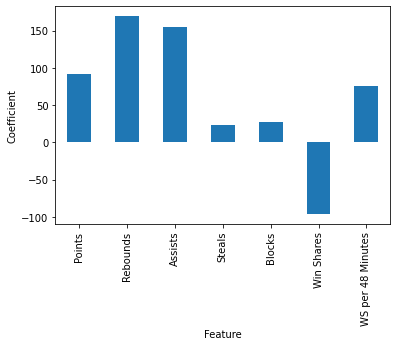

In [16]:
coef = model["lr"].coef_
keys = ["Points", "Rebounds", "Assists", "Steals", "Blocks", "Win Shares", "WS per 48 Minutes"]
series = pd.Series(coef, keys)
series.plot.bar(xlabel="Feature", ylabel="Coefficient")

In [42]:
model.score(test[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]], test["points_won"])

-0.38030684168086415

In [18]:
test

,player,age,team_id,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,Giannis Antetokounmpo,25,MIL,85.0,962.0,1010,0.952,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279
1,LeBron James,35,LAL,16.0,753.0,1010,0.746,67,34.6,25.3,7.8,10.2,1.2,0.5,0.493,0.348,0.693,9.8,0.204
2,James Harden,30,HOU,0.0,367.0,1010,0.363,68,36.5,34.3,6.6,7.5,1.8,0.9,0.444,0.355,0.865,13.1,0.254
3,Luka Dončić,20,DAL,0.0,200.0,1010,0.198,61,33.6,28.8,9.4,8.8,1.0,0.2,0.463,0.316,0.758,8.8,0.207
4,Kawhi Leonard,28,LAC,0.0,168.0,1010,0.166,57,32.4,27.1,7.1,4.9,1.8,0.6,0.470,0.378,0.886,8.7,0.226
5,Anthony Davis,26,LAL,0.0,82.0,1010,0.081,62,34.4,26.1,9.3,3.2,1.5,2.3,0.503,0.330,0.846,11.1,0.250
6,Chris Paul,34,OKC,0.0,26.0,1010,0.026,70,31.5,17.6,5.0,6.7,1.6,0.2,0.489,0.365,0.907,8.9,0.193
7,Damian Lillard,29,POR,0.0,23.0,1010,0.023,66,37.5,30.0,4.3,8.0,1.1,0.3,0.463,0.401,0.888,11.6,0.225
8,Nikola Jokić,24,DEN,0.0,18.0,1010,0.018,73,32.0,19.9,9.7,7.0,1.2,0.6,0.528,0.314,0.817,9.8,0.202
9,Pascal Siakam,25,TOR,0.0,17.0,1010,0.017,60,35.2,22.9,7.3,3.5,1.0,0.9,0.453,0.359,0.792,5.4,0.123


In [19]:
test2

,player,age,team_id,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,Giannis Antetokounmpo,24,MIL,78.0,941.0,1010,0.932,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292
1,James Harden,29,HOU,23.0,776.0,1010,0.768,78,36.8,36.1,6.6,7.5,2.0,0.7,0.442,0.368,0.879,15.2,0.254
2,Paul George,28,OKC,0.0,356.0,1010,0.352,77,36.9,28.0,8.2,4.1,2.2,0.4,0.438,0.386,0.839,11.9,0.201
3,Nikola Jokić,23,DEN,0.0,212.0,1010,0.210,80,31.3,20.1,10.8,7.3,1.4,0.7,0.511,0.307,0.821,11.8,0.226
4,Stephen Curry,30,GSW,0.0,175.0,1010,0.173,69,33.8,27.3,5.3,5.2,1.3,0.4,0.472,0.437,0.916,9.7,0.199
5,Damian Lillard,28,POR,0.0,69.0,1010,0.068,80,35.5,25.8,4.6,6.9,1.1,0.4,0.444,0.369,0.912,12.1,0.205
6,Joel Embiid,24,PHI,0.0,49.0,1010,0.049,64,33.7,27.5,13.6,3.7,0.7,1.9,0.484,0.300,0.804,8.7,0.194
7,Kevin Durant,30,GSW,0.0,25.0,1010,0.025,78,34.6,26.0,6.4,5.9,0.7,1.1,0.521,0.353,0.885,11.5,0.204
8,Kawhi Leonard,27,TOR,0.0,13.0,1010,0.013,60,34.0,26.6,7.3,3.3,1.8,0.4,0.496,0.371,0.854,9.5,0.224
9,Russell Westbrook,30,OKC,0.0,8.0,1010,0.008,73,36.0,22.9,11.1,10.7,1.9,0.5,0.428,0.290,0.656,6.8,0.124


In [20]:
model = Pipeline([
    ("std", StandardScaler()),
    ("lr", LinearRegression())
])
model.fit(test[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]], test["points_won"])
test2["predicted_votes"] = model.predict(test2[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]])

In [21]:
test2.sort_values("predicted_votes", ascending=False)

,player,age,team_id,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,predicted_votes
9,Russell Westbrook,30,OKC,0.0,8.0,1010,0.008,73,36.0,22.9,11.1,10.7,1.9,0.5,0.428,0.290,0.656,6.8,0.124,724.121544
0,Giannis Antetokounmpo,24,MIL,78.0,941.0,1010,0.932,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292,525.805828
6,Joel Embiid,24,PHI,0.0,49.0,1010,0.049,64,33.7,27.5,13.6,3.7,0.7,1.9,0.484,0.300,0.804,8.7,0.194,519.566363
11,LeBron James,34,LAL,0.0,1.0,1010,0.001,55,35.2,27.4,8.5,8.3,1.3,0.6,0.510,0.339,0.665,7.2,0.179,496.632126
3,Nikola Jokić,23,DEN,0.0,212.0,1010,0.210,80,31.3,20.1,10.8,7.3,1.4,0.7,0.511,0.307,0.821,11.8,0.226,325.776466
1,James Harden,29,HOU,23.0,776.0,1010,0.768,78,36.8,36.1,6.6,7.5,2.0,0.7,0.442,0.368,0.879,15.2,0.254,280.040098
2,Paul George,28,OKC,0.0,356.0,1010,0.352,77,36.9,28.0,8.2,4.1,2.2,0.4,0.438,0.386,0.839,11.9,0.201,58.997016
8,Kawhi Leonard,27,TOR,0.0,13.0,1010,0.013,60,34.0,26.6,7.3,3.3,1.8,0.4,0.496,0.371,0.854,9.5,0.224,38.063244
10,Rudy Gobert,26,UTA,0.0,1.0,1010,0.001,81,31.8,15.9,12.9,2.0,0.8,2.3,0.669,NaN,0.636,14.4,0.268,10.666831
7,Kevin Durant,30,GSW,0.0,25.0,1010,0.025,78,34.6,26.0,6.4,5.9,0.7,1.1,0.521,0.353,0.885,11.5,0.204,-30.642572


In [22]:
lr.coef_

array([  19.49427051,   72.05148583,   70.65778437,   72.57407276,
         51.56633017,  -48.01577523, 1805.32783472])

In [23]:
nine = vote_predict(2019)
twenty = vote_predict(2020)

In [24]:
frames = [nine, twenty]
data = pd.concat(frames, ignore_index=True)

In [25]:
model = Pipeline([
    ("std", StandardScaler()),
    ("lr", LinearRegression())
])
model.fit(data[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]], data["points_won"])
test["predicted_votes"] = model.predict(test[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]])

In [26]:
test.sort_values("predicted_votes", ascending=False)

,player,age,team_id,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,predicted_votes
0,Giannis Antetokounmpo,25,MIL,85.0,962.0,1010,0.952,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279,705.807824
2,James Harden,30,HOU,0.0,367.0,1010,0.363,68,36.5,34.3,6.6,7.5,1.8,0.9,0.444,0.355,0.865,13.1,0.254,512.181153
3,Luka Dončić,20,DAL,0.0,200.0,1010,0.198,61,33.6,28.8,9.4,8.8,1.0,0.2,0.463,0.316,0.758,8.8,0.207,419.980030
7,Damian Lillard,29,POR,0.0,23.0,1010,0.023,66,37.5,30.0,4.3,8.0,1.1,0.3,0.463,0.401,0.888,11.6,0.225,269.525328
1,LeBron James,35,LAL,16.0,753.0,1010,0.746,67,34.6,25.3,7.8,10.2,1.2,0.5,0.493,0.348,0.693,9.8,0.204,252.495253
4,Kawhi Leonard,28,LAC,0.0,168.0,1010,0.166,57,32.4,27.1,7.1,4.9,1.8,0.6,0.470,0.378,0.886,8.7,0.226,219.411008
8,Nikola Jokić,24,DEN,0.0,18.0,1010,0.018,73,32.0,19.9,9.7,7.0,1.2,0.6,0.528,0.314,0.817,9.8,0.202,154.474473
5,Anthony Davis,26,LAL,0.0,82.0,1010,0.081,62,34.4,26.1,9.3,3.2,1.5,2.3,0.503,0.330,0.846,11.1,0.250,129.925154
10,Jimmy Butler,30,MIA,0.0,9.0,1010,0.009,58,33.8,19.9,6.7,6.0,1.8,0.6,0.455,0.244,0.834,9.0,0.221,39.871549
6,Chris Paul,34,OKC,0.0,26.0,1010,0.026,70,31.5,17.6,5.0,6.7,1.6,0.2,0.489,0.365,0.907,8.9,0.193,-107.692428
